# **Data Analytics with LLM (GPT4, GPT3.5turbo, GPT3.5) - OpenAI ChatGPT**

## **Creating Dataset**

In [ ]:
!pip install pandas numpy
!pip install openai

In [2]:
import pandas as pd
import numpy as np
from random import choices

In [3]:
np.random.seed(10)

In [4]:
num_records = 1000
num_outlets = 15
num_products = 20

In [5]:
dates = pd.date_range(start="2023-01-01", end="2023-06-30")
dates = choices(dates, k=num_records)

In [6]:
outlets = ['outlet_'+ str(i+1) for i in range (num_outlets)]
outlets = choices(outlets, k=num_records)

In [7]:
products = ['outlet_'+ str(i+1) for i in range (num_products)]
products = choices(products, k=num_records)

In [8]:
units_sold = np.random.randint(1,200,num_records)
price_per_unit = np.random.uniform(10,500,num_records)
total_sales = units_sold * price_per_unit

In [9]:
df = pd.DataFrame({
    "Date": dates,
    "Outlet": outlets,
    "Product": products,
    "Units Sold": units_sold,
    "Price per Unit": price_per_unit,
    "Total Sale": total_sales
})

In [50]:
df

,Date,Outlet,Product,Units Sold,Price per Unit,Total Sale
0,2023-02-07,outlet_14,outlet_11,10,27.204538,272.045385
1,2023-05-02,outlet_9,outlet_3,126,195.408008,24621.409060
2,2023-01-04,outlet_4,outlet_14,16,185.391255,2966.260076
3,2023-05-11,outlet_4,outlet_18,65,137.191145,8917.424411
4,2023-02-13,outlet_4,outlet_2,114,304.343828,34695.196345
...,...,...,...,...,...,...
995,2023-01-31,outlet_7,outlet_4,37,19.028276,704.046201
996,2023-03-05,outlet_4,outlet_13,91,372.000914,33852.083211
997,2023-04-30,outlet_15,outlet_20,148,37.062541,5485.256005
998,2023-05-26,outlet_9,outlet_6,33,289.563788,9555.605018


## **Pandas AI Integration**

In [55]:
OPEN_API_KEY="YOUR_API_KEY"

In [56]:
!pip install pandasai

Since PandasAI is powered by a LLM, you should import the LLM you'd like to use for your use case. In thic case we're gonna use OpenAI.

To use OpenAI, you'll need a API token. Follow below simple steps to generate your API_TOKEN with
[openai](https://platform.openai.com/overview).

1. Go to  https://openai.com/api/ and signup with your email address or connect your Google Account.
2. Go to View API Keys on left side of your Personal Account Settings
3. Select Create new Secret key

> The API access to openai is a paid service. You have to set up billing.
>Read the [Pricing](https://platform.openai.com/docs/quickstart/pricing) information before experimenting.

In [57]:
import pandasai
from pandasai.llm.openai import OpenAI
from pandasai import Agent
from pandasai import SmartDataframe

In [58]:
llm = OpenAI(api_token=OPEN_API_KEY)


**Now that we have instantiated the LLM, we can finally instantiate the `SmartDataframe`**

In [59]:
sdf = SmartDataframe(df, config={"llm": llm})

**You can now query it in natural language**

In [60]:
Highest_product = sdf.chat('Tell me the product that has highest total_sale?')


In [61]:
Highest_product

'The product with the highest total sale is outlet_14.'

In [64]:
sdf.chat('Format price_per_unit and total_sale to 2 decimal places ')

,Date,Outlet,Product,Units Sold,Price per Unit,Total Sale
0,2023-02-07,outlet_14,outlet_11,10,27.20,272.05
1,2023-05-02,outlet_9,outlet_3,126,195.41,24621.41
2,2023-01-04,outlet_4,outlet_14,16,185.39,2966.26
3,2023-05-11,outlet_4,outlet_18,65,137.19,8917.42
4,2023-02-13,outlet_4,outlet_2,114,304.34,34695.20
...,...,...,...,...,...,...
995,2023-01-31,outlet_7,outlet_4,37,19.03,704.05
996,2023-03-05,outlet_4,outlet_13,91,372.00,33852.08
997,2023-04-30,outlet_15,outlet_20,148,37.06,5485.26
998,2023-05-26,outlet_9,outlet_6,33,289.56,9555.61


## **Plotting Charts**

'/content/exports/charts/temp_chart.png'

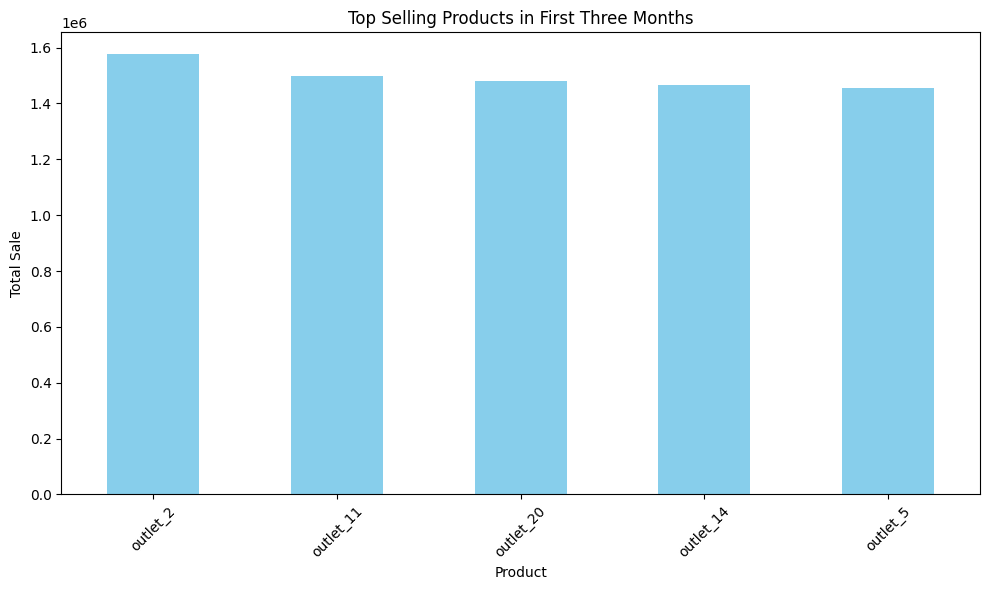

In [65]:
sdf.chat('Draw a chart for top selling products in first three months')

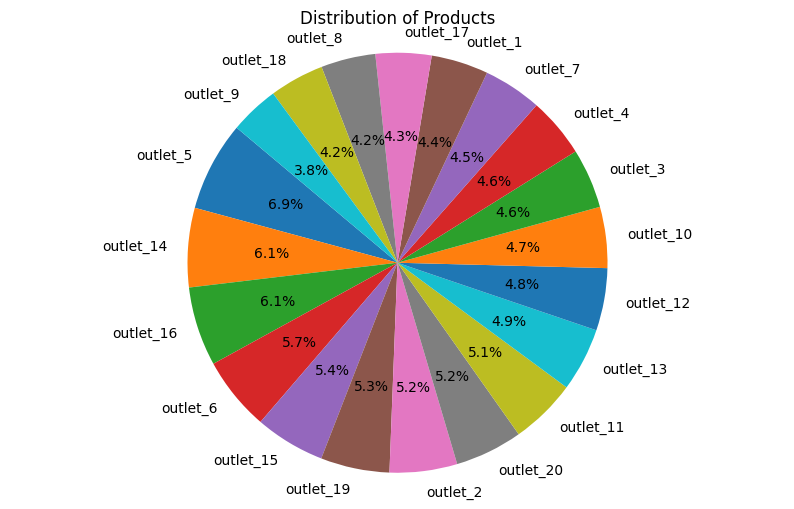

'/content/exports/charts/temp_chart.png'

In [67]:
sdf.chat('Draw only one pie chart for products')

In [68]:
sdf.chat('Give me the summary of data ')

,Units Sold,Price per Unit,Total Sale
count,1000.0000,1000.000000,1000.000000
mean,97.0930,256.789890,24998.838030
std,56.6087,142.461096,21820.873674
min,1.0000,10.060000,16.730000
25%,49.0000,139.215000,7043.665000
50%,97.0000,252.570000,18616.815000
75%,145.2500,379.437500,38424.952500
max,199.0000,499.650000,96560.860000


from matplotlib import pyplot as plt
_df_0['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price per Unit'].plot(kind='hist', bins=20, title='Price per Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Total Sale'].plot(kind='hist', bins=20, title='Total Sale')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Units Sold', y='Price per Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Price per Unit', y='Total Sale', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Units Sold'].plot(kind='line', figsize=(8, 4), title='Units Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Price per Unit'].plot(kind='line', figsize=(8, 4), title='Price per Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Total Sale'].plot(kind='line', figsize=(8, 4), title='Total Sale')
plt.gca().spines[['top', 'right']].set_visible(False)